# Data Science Salary Predictions in 2023

### CS673 Scalable Databases: Midterm Project

**by: Kelsey Woods and Aayushi Verma**

### Presentation Materials

- Video: https://youtu.be/z1-39Pkm-2E
- Slides: https://docs.google.com/presentation/d/1owkbBWOMt1BWDHP00tqExIKYl3UMITySXcAkUjH3XqU/edit?usp=sharing

### Data

We used 2 datasets from Kaggle.
1. [Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)
2. [Data Science and STEM Salaries](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries?select=Levels_Fyi_Salary_Data.csv)

These datasets describe data science-related job titles and salaries. 

In [1]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading CSV data into pandas dataframe
salary = pd.read_csv("/work/ds_salaries.csv")

In [3]:
# checking data
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# checking data types
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
#checking for null values
salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
#looks like there are no null values to worry but let's check for missing values too!
while("" in salary) :
    salary.remove("")
print(salary)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

In [7]:
# also, we should drop the salary column because that could be any currency!
salary = salary.drop('salary', axis=1)

In [8]:
# dropping duplicate values
salary.drop_duplicates(inplace=True)

In [9]:
#let's narrow down to data scientists who are full time
salary_ds_ft = salary[salary['job_title'] == "Data Scientist"]
salary_ds_ft = salary_ds_ft[salary_ds_ft['employment_type'] == "FT"]
salary_ds_ft.head(10)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,USD,147100,US,0,US,M
10,2023,SE,FT,Data Scientist,USD,90700,US,0,US,M
17,2023,SE,FT,Data Scientist,USD,170000,US,0,US,M
18,2023,SE,FT,Data Scientist,USD,150000,US,0,US,M
46,2023,SE,FT,Data Scientist,USD,212750,US,100,US,M
47,2023,SE,FT,Data Scientist,USD,185000,US,100,US,M


In [10]:
salary_ds_ft[salary_ds_ft['salary_in_usd']>=200000]

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7,2023,SE,FT,Data Scientist,USD,219000,CA,0,CA,M
46,2023,SE,FT,Data Scientist,USD,212750,US,100,US,M
48,2023,SE,FT,Data Scientist,USD,262000,US,100,US,M
49,2023,SE,FT,Data Scientist,USD,245000,US,100,US,M
50,2023,SE,FT,Data Scientist,USD,275300,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...
3326,2022,SE,FT,Data Scientist,USD,205300,US,0,US,M
3360,2022,SE,FT,Data Scientist,USD,230000,US,100,US,M
3400,2022,SE,FT,Data Scientist,USD,220000,US,100,US,M
3406,2022,MI,FT,Data Scientist,USD,200000,US,100,US,M


/tmp/ipykernel_145/1828206679.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_ds_ft["salary_in_usd"])


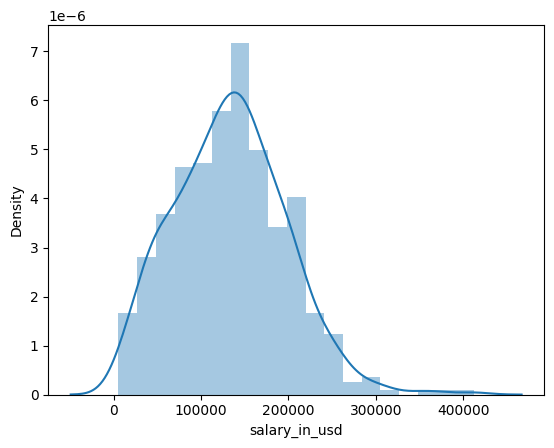

In [11]:
# visualization to check for outliers
sns.distplot(salary_ds_ft["salary_in_usd"])
 
# Show the plot
plt.show()

In [12]:
# this pandas package function allows us to quickly encode while viewing the data!
salary_e = pd.get_dummies(salary_ds_ft)
salary_e.head(15)

,work_year,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,job_title_Data Scientist,salary_currency_AUD,...,company_location_NL,company_location_PL,company_location_RO,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_size_L,company_size_M,company_size_S
3,2023,175000,100,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2023,120000,100,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
7,2023,219000,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
8,2023,141000,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
9,2023,147100,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
10,2023,90700,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
17,2023,170000,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
18,2023,150000,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
46,2023,212750,100,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
47,2023,185000,100,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [13]:
#let's also describe this data to get a better understanding
salary_e.describe()

,work_year,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,job_title_Data Scientist,salary_currency_AUD,...,company_location_NL,company_location_PL,company_location_RO,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_size_L,company_size_M,company_size_S
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.0,534.0,534.000000,...,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2022.262172,133349.548689,47.940075,0.101124,0.014981,0.271536,0.612360,1.0,1.0,0.003745,...,0.007491,0.001873,0.001873,0.001873,0.005618,0.001873,0.739700,0.166667,0.782772,0.050562
std,0.761769,63953.104787,47.994177,0.301775,0.121592,0.445169,0.487669,0.0,0.0,0.061142,...,0.086305,0.043274,0.043274,0.043274,0.074812,0.043274,0.439209,0.373027,0.412746,0.219307
min,2020.000000,5679.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,86579.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2022.000000,134000.000000,50.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2023.000000,175000.000000,100.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2023.000000,412000.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


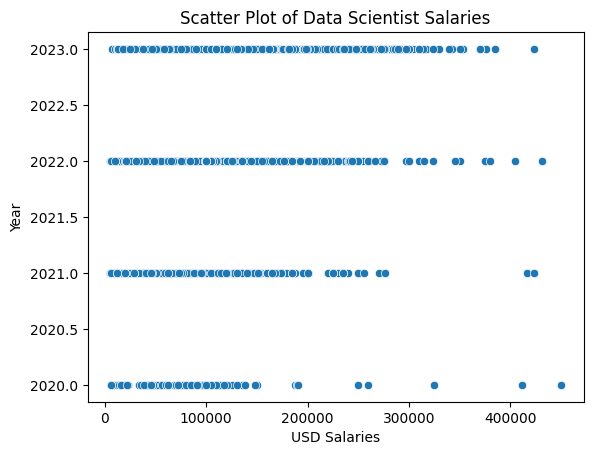

In [14]:
#scatterplot time!
sns.scatterplot(x = 'salary_in_usd', y = 'work_year', data = salary)

# Set plot title and axis labels
plt.title('Scatter Plot of Data Scientist Salaries')
plt.xlabel('USD Salaries')
plt.ylabel('Year')

# Display the plot
plt.show()

#as you can see we do not have two numeric variables with variability to visualize the data in a scatterplot

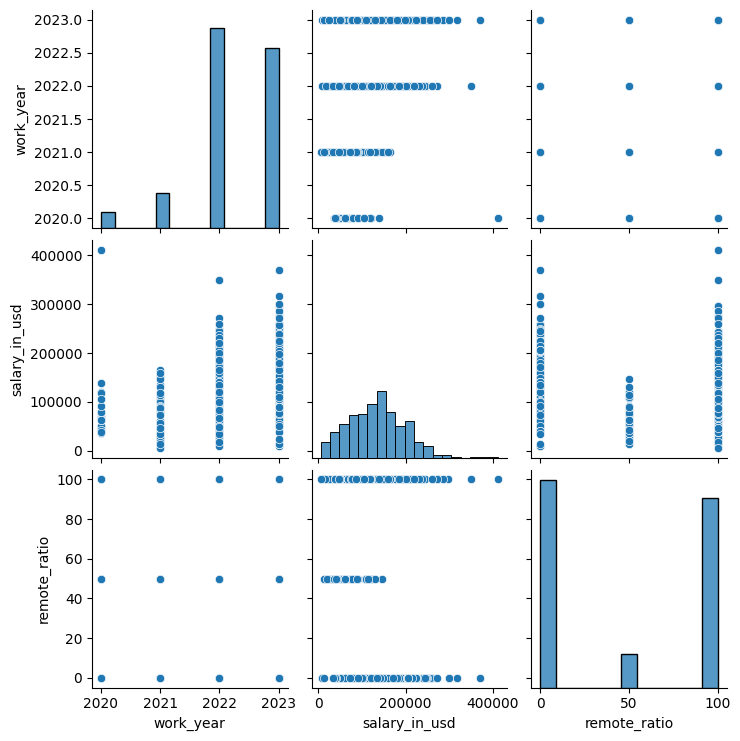

In [15]:
#pairplot time!

sns.pairplot(salary_ds_ft)

In [16]:
# salary_e2 = salary_e.drop('')

Now let's add another data source! https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries?select=Levels_Fyi_Salary_Data.csv

In [17]:
# reading with numpy
data = np.loadtxt('/work/Levels_Fyi_Salary_Data.csv', delimiter=',', dtype=str, usecols=range(19))

print(data)

[['company' 'title' 'totalyearlycompensation' ... 'Race_Two_Or_More'
  'Race_Black' 'Race_Hispanic']
 ['Oracle' 'Product Manager' '127000' ... '0' '0' '0']
 ['eBay' 'Software Engineer' '100000' ... '0' '0' '0']
 ...
 ['MSFT' 'Software Engineer' '220000' ... '0' '0' '0']
 ['Salesforce' 'Software Engineer' '280000' ... '0' '0' '0']
 ['apple' 'Software Engineer' '200000' ... '0' '0' '0']]


In [18]:
data[1:,2]

array(['127000', '100000', '310000', ..., '220000', '280000', '200000'],
      dtype='<U39')

In [19]:
all_salaries = data[1:,2]
all_salaries = all_salaries[all_salaries != 'Software Engineer']
print(np.unique(all_salaries))

['10000' '100000' '1000000' '1005000' '101000' '1010000' '1011000'
 '102000' '1020000' '1026000' '103000' '1030000' '1035000' '1037000'
 '104000' '1040000' '1048000' '105000' '1050000' '1052000' '106000'
 '1068000' '107000' '1070000' '1072000' '108000' '1080000' '109000'
 '1098000' '11000' '110000' '1100000' '1105000' '111000' '1110000'
 '112000' '1120000' '1125000' '113000' '1130000' '1131000' '114000'
 '1140000' '1148000' '115000' '1150000' '116000' '1160000' '117000'
 '118000' '1185000' '119000' '12000' '120000' '1200000' '1203000' '121000'
 '1210000' '1218000' '122000' '1220000' '1225000' '123000' '124000'
 '1240000' '125000' '1250000' '126000' '1260000' '127000' '128000'
 '1280000' '129000' '1290000' '13000' '130000' '1300000' '131000' '132000'
 '1325000' '133000' '134000' '135000' '1355000' '135750' '136000' '137000'
 '138000' '139000' '14000' '140000' '1400000' '1407000' '141000' '142000'
 '1425000' '143000' '144000' '1440000' '144500' '145000' '1450000'
 '146000' '147000' '1470

In [20]:
all_salaries = all_salaries.astype(int)

In [21]:
print(f'Minimum salary in 2023: ${np.round(np.min(all_salaries),2)}')
print(f'Maximum salary in 2023: ${np.round(np.max(all_salaries),2)}')
print(f'Mean salary in 2023: ${np.round(np.mean(all_salaries),2)}')
print(f'Median salary in 2023: ${np.round(np.median(all_salaries),2)}')
print(f'Standard deviation of salary in 2023: ${np.round(np.std(all_salaries),2)}')

Minimum salary in 2023: $10000
Maximum salary in 2023: $4980000
Mean salary in 2023: $216306.58
Median salary in 2023: $188000.0
Standard deviation of salary in 2023: $138036.32


In [22]:
salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


In [23]:
salary[salary['job_title'] == 'Data Scientist']['salary_in_usd'].mean()

132974.5873605948

In [24]:
sorted_salaries = salary.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

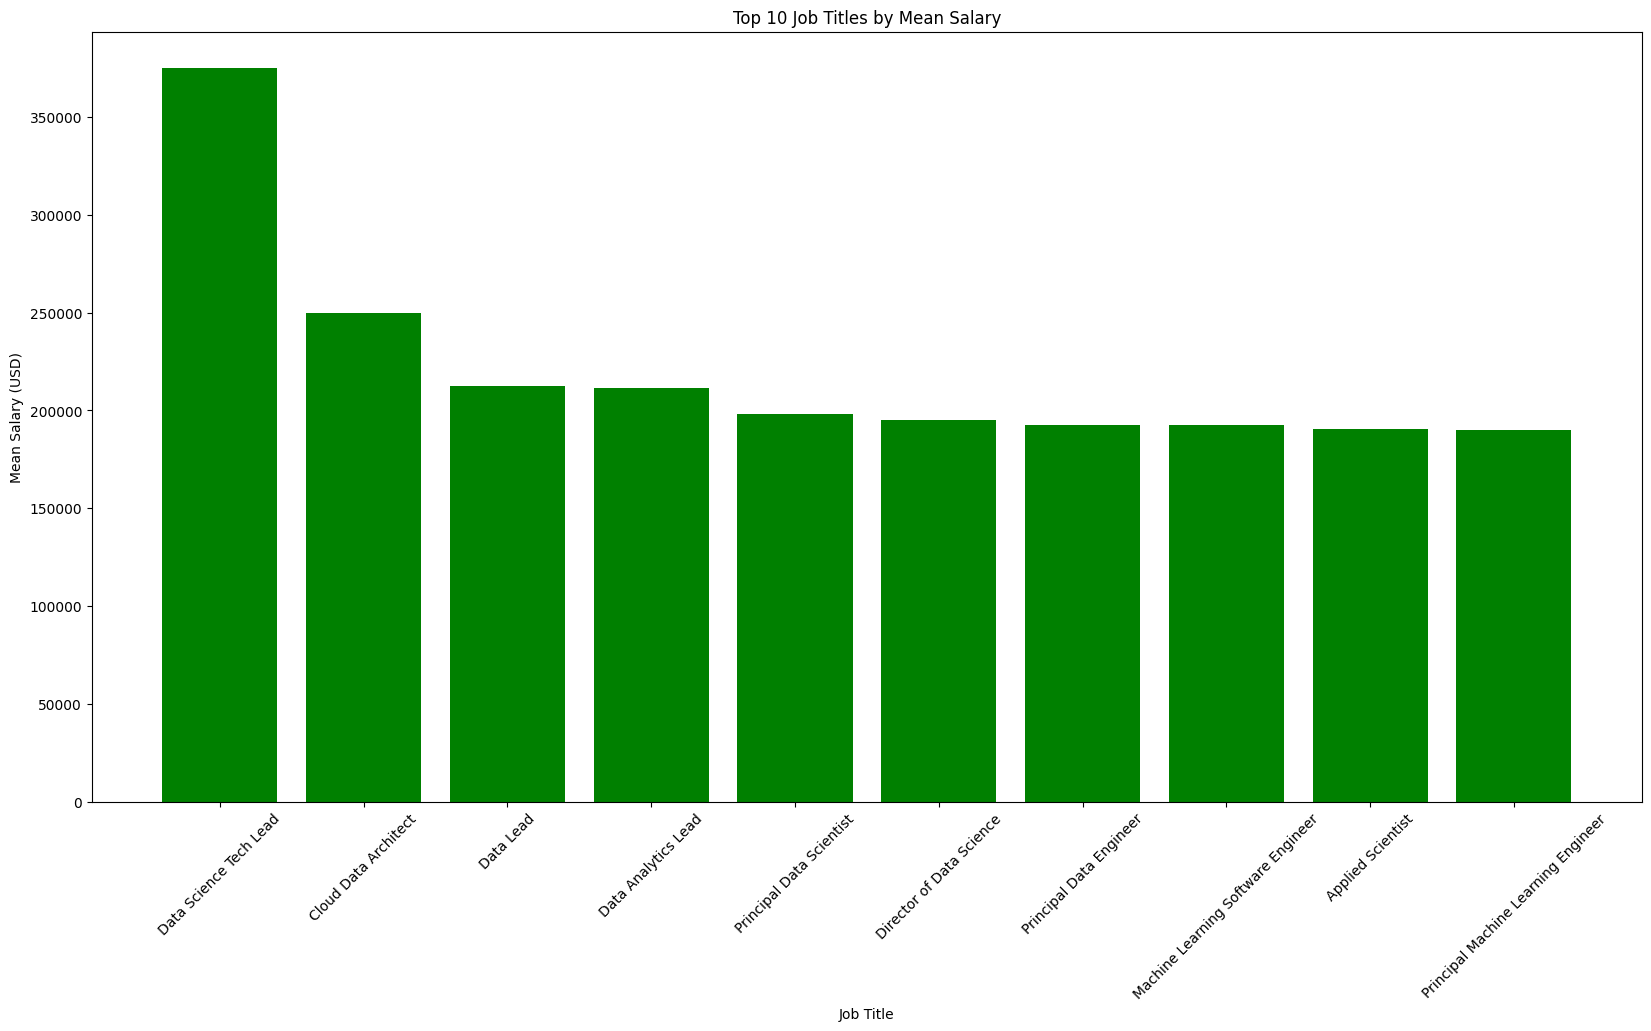

In [25]:
plt.figure(figsize=(20,10))

# Create the plot
plt.bar(sorted_salaries.index[:10],sorted_salaries.values[:10],color='green')

# Add labels and title
plt.xlabel('Job Title')
plt.xticks(rotation=45)
plt.ylabel('Mean Salary (USD)')
plt.title('Top 10 Job Titles by Mean Salary')

# Show the plot
plt.show()

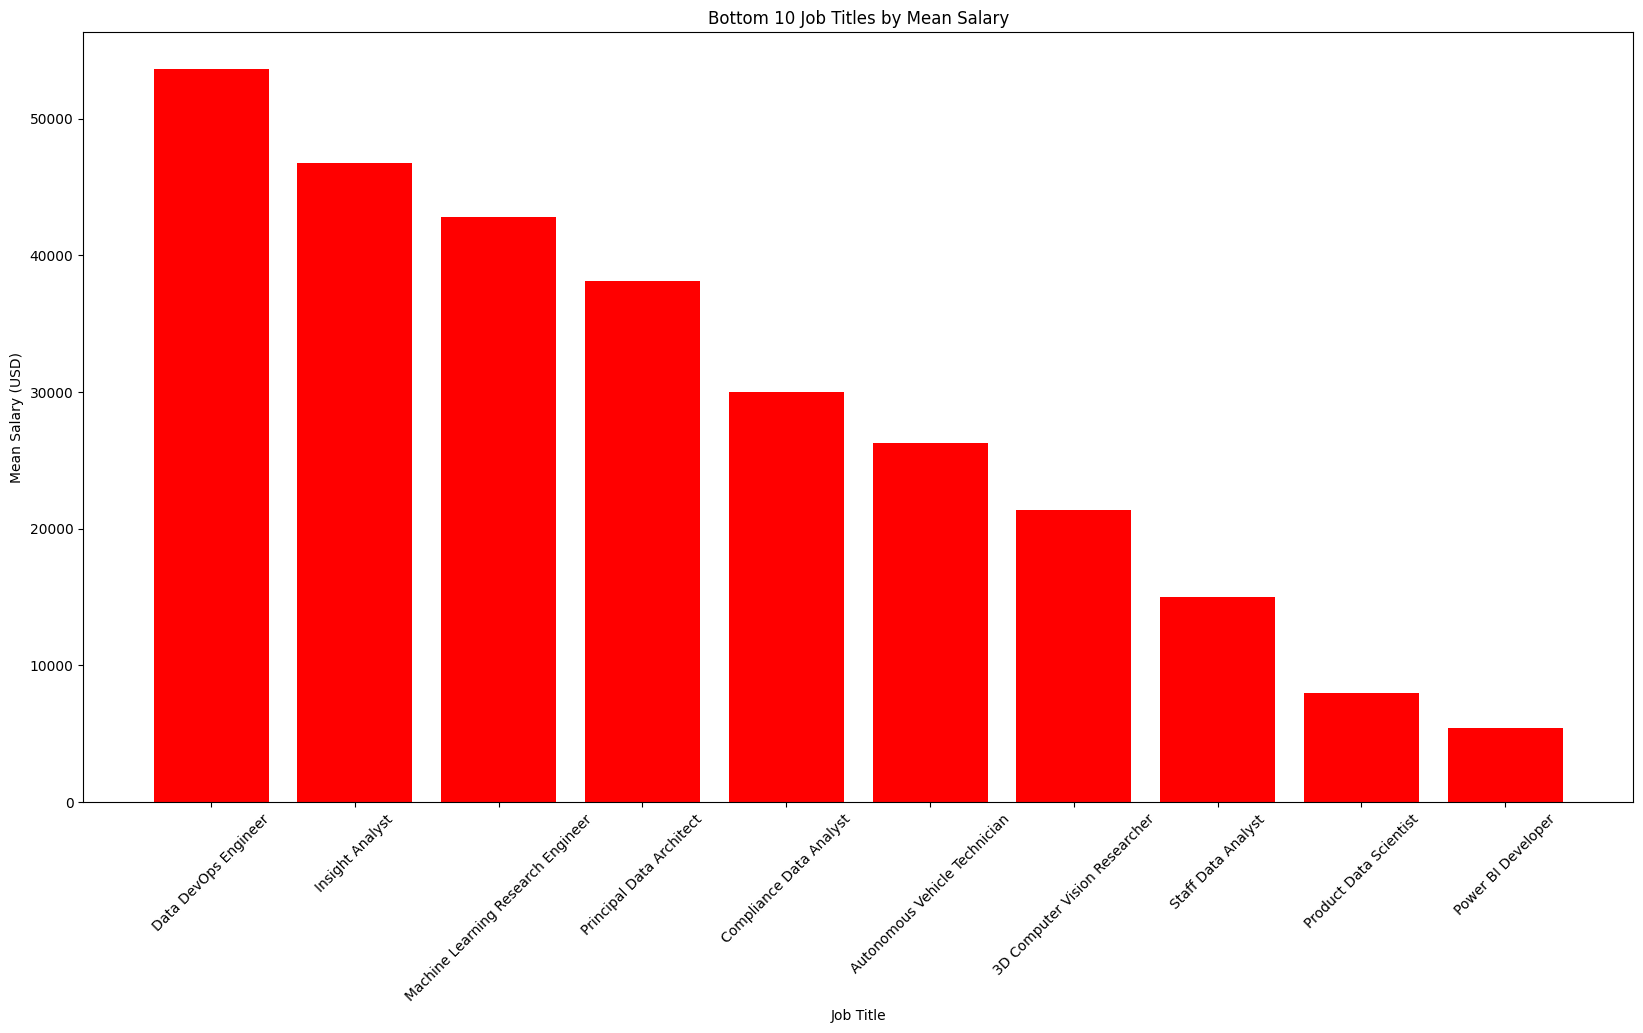

In [26]:
plt.figure(figsize=(20,10))

# Create the plot
plt.bar(sorted_salaries.index[-10:],sorted_salaries.values[-10:],color='red')

# Add labels and title
plt.xlabel('Job Title')
plt.xticks(rotation=45)
plt.ylabel('Mean Salary (USD)')
plt.title('Bottom 10 Job Titles by Mean Salary')

# Show the plot
plt.show()

Text(0, 0.5, 'Salary in USD ($)')

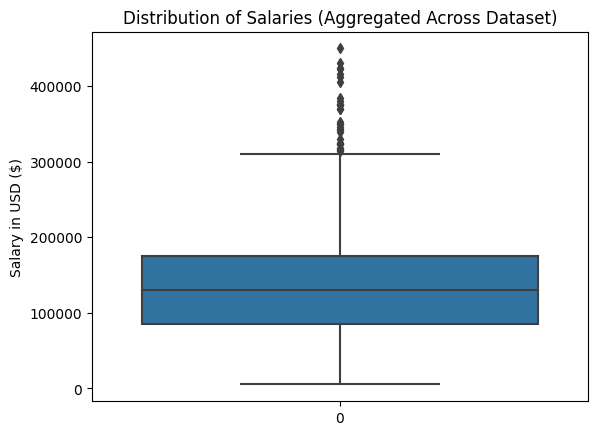

In [27]:
sns.boxplot(salary['salary_in_usd'])
plt.title('Distribution of Salaries (Aggregated Across Dataset)')
plt.ylabel('Salary in USD ($)')

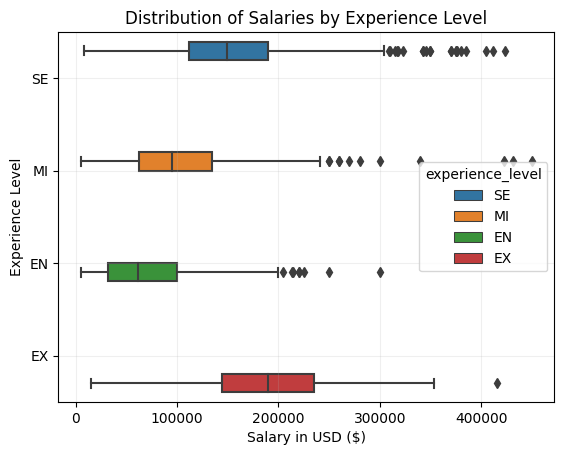

In [28]:
sns.boxplot(x=salary['salary_in_usd'],y=salary['experience_level'],hue=salary['experience_level'])
plt.title('Distribution of Salaries by Experience Level')
plt.xlabel('Salary in USD ($)')
plt.ylabel('Experience Level')
plt.grid(alpha=0.2)

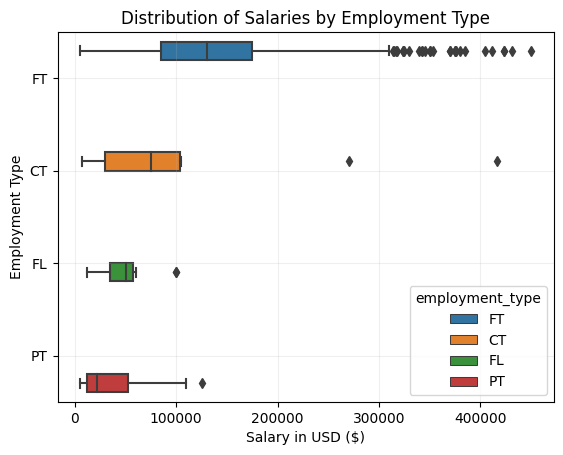

In [29]:
sns.boxplot(x=salary['salary_in_usd'],y=salary['employment_type'],hue=salary['employment_type'])
plt.title('Distribution of Salaries by Employment Type')
plt.xlabel('Salary in USD ($)')
plt.ylabel('Employment Type')
plt.grid(alpha=0.2)

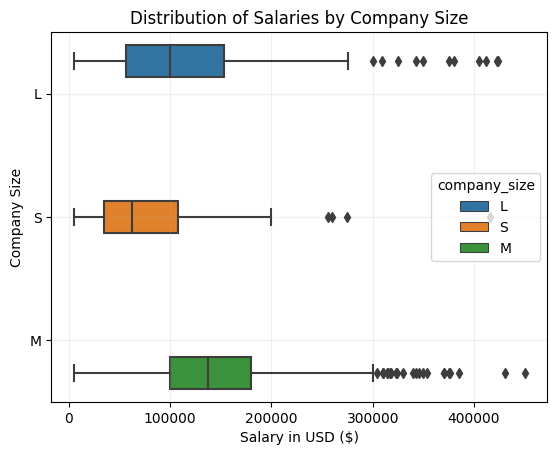

In [30]:
sns.boxplot(x=salary['salary_in_usd'],y=salary['company_size'],hue=salary['company_size'])
plt.title('Distribution of Salaries by Company Size')
plt.xlabel('Salary in USD ($)')
plt.ylabel('Company Size')
plt.grid(alpha=0.2)

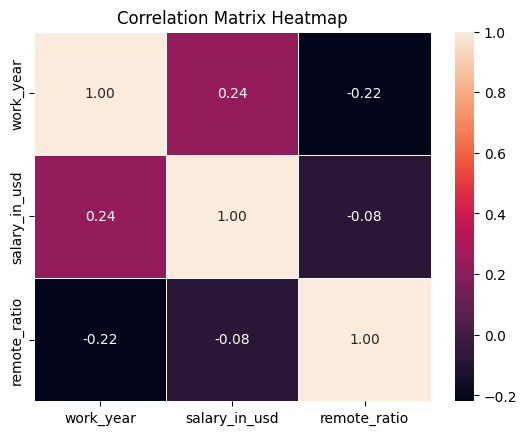

In [31]:
corr = salary.corr()
sns.heatmap(corr, annot=True, cmap='rocket', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

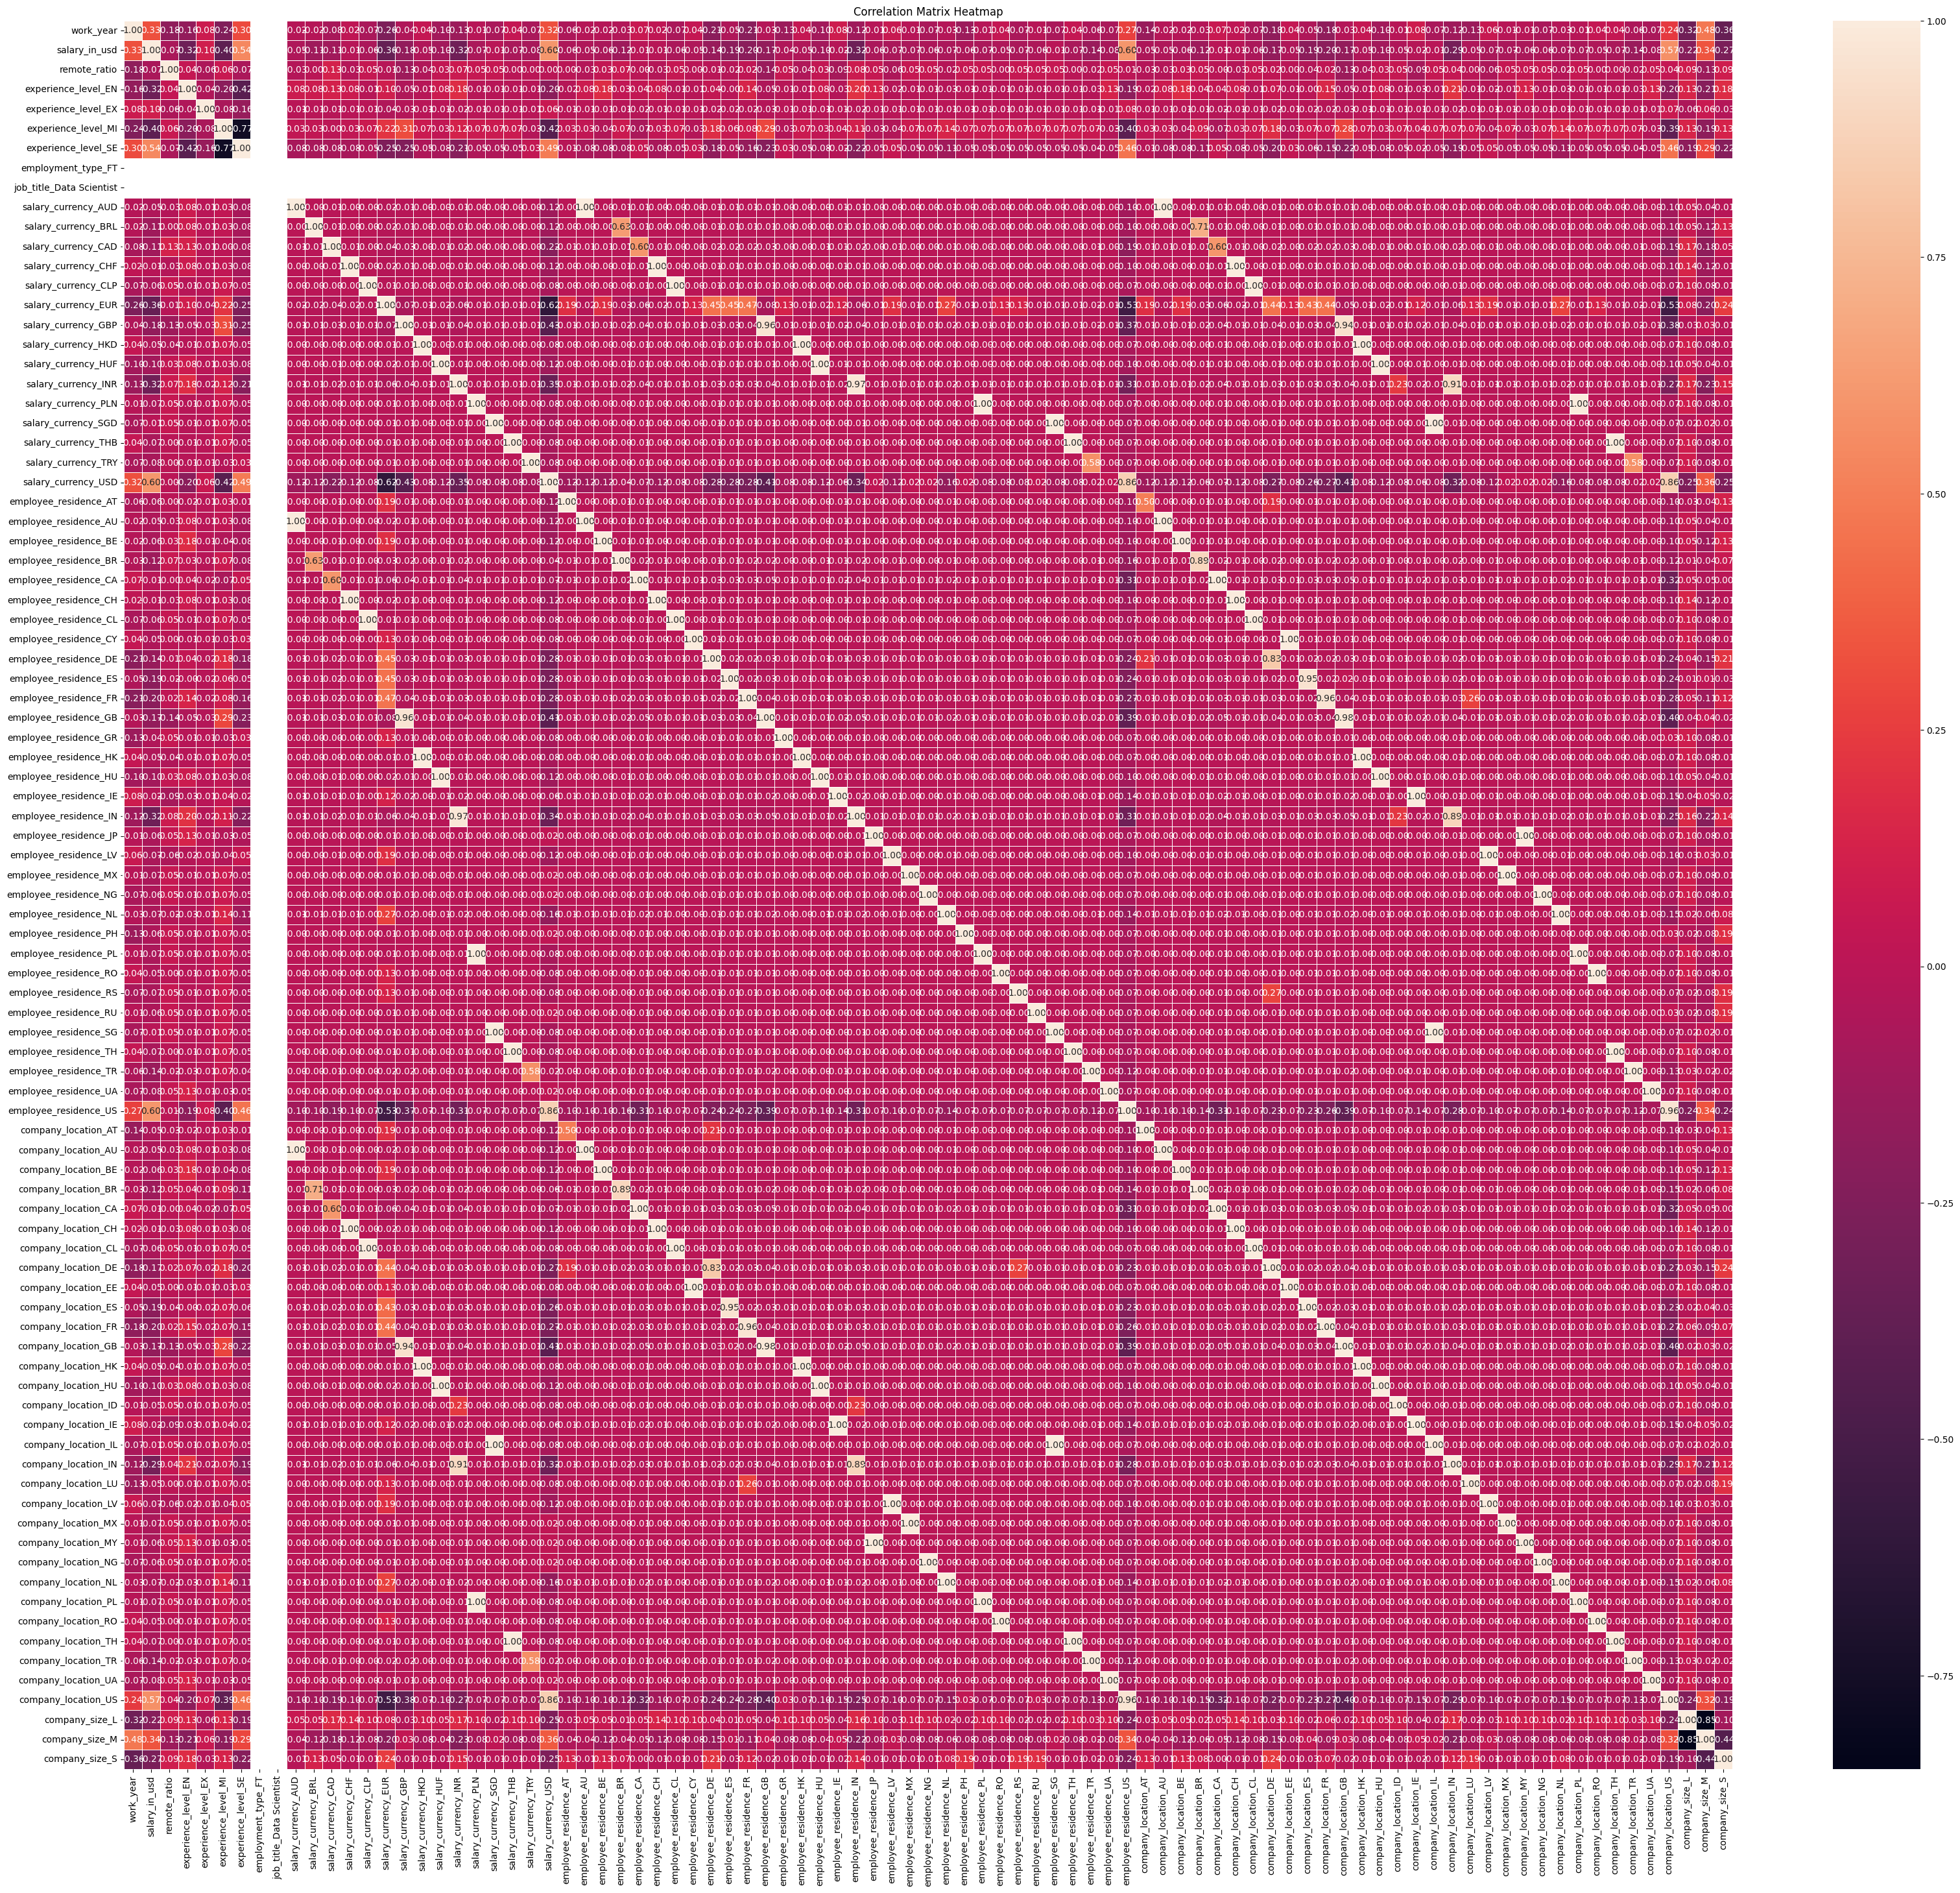

In [32]:
corr = salary_e.corr()
plt.figure(figsize=(40,35))
sns.heatmap(corr, annot=True, cmap='rocket', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [33]:
salary.head(5)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


In [34]:
experience_levels = salary['experience_level'].unique()
employment_types = salary['employment_type'].unique()
job_titles = salary['job_title'].unique()
employee_residences = salary['employee_residence'].unique()
remote_ratios = salary['remote_ratio'].unique()
company_locations = salary['company_location'].unique()
company_sizes = salary['company_size'].unique()

In [35]:
salary.groupby('experience_level').mean()['salary_in_usd'].sort_values(ascending=False)

experience_level
EX    191078.208333
SE    153897.435650
MI    101828.783133
EN     72648.685185
Name: salary_in_usd, dtype: float64

In [36]:
salary.groupby('employment_type').mean()['salary_in_usd'].sort_values(ascending=False)

employment_type
FT    134434.613271
CT    113446.900000
FL     51807.800000
PT     39533.705882
Name: salary_in_usd, dtype: float64

In [37]:
salary.groupby('job_title').mean()['salary_in_usd'].sort_values(ascending=False)

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64

In [38]:
salary.groupby('employee_residence').mean()['salary_in_usd'].sort_values(ascending=False)

employee_residence
IL    423834.000000
MY    200000.000000
PR    166000.000000
US    153972.206550
CA    130859.839506
          ...      
MD     18000.000000
ID     15000.000000
SK     12608.000000
MA     10000.000000
MK      6304.000000
Name: salary_in_usd, Length: 78, dtype: float64

In [39]:
salary.groupby('remote_ratio').mean()['salary_in_usd'].sort_values(ascending=False)

remote_ratio
0      143690.173693
100    131821.666391
50      78486.609626
Name: salary_in_usd, dtype: float64

In [40]:
salary.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

company_location
IL    271446.500000
PR    167500.000000
US    152374.791602
RU    140333.333333
CA    130572.759036
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64

In [41]:
salary.groupby('company_size').mean()['salary_in_usd'].sort_values(ascending=False)

company_size
M    141474.514300
L    113202.239609
S     78364.278912
Name: salary_in_usd, dtype: float64

In [42]:
import random

random_numbers = []
for _ in range(14):
    random_numbers.append(random.randint(100000, 500000))

print(random_numbers)


[442227, 143051, 415542, 473850, 452653, 184731, 133142, 182660, 189665, 410486, 371805, 213215, 130366, 148902]


In [43]:
df = pd.DataFrame({
    'company_location': ['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA'],
    'salary_in_usd': [395680, 470426, 419576, 312315, 322698, 124548, 359804, 240372, 347810, 335719, 437534, 299730, 165499, 385834]
})

# Extract the column values as arguments using zip
args = list(zip(df['company_location'], df['salary_in_usd']))

print(args)

[('ES', 395680), ('US', 470426), ('CA', 419576), ('DE', 312315), ('GB', 322698), ('NG', 124548), ('IN', 359804), ('HK', 240372), ('NL', 347810), ('CH', 335719), ('CF', 437534), ('FR', 299730), ('FI', 165499), ('UA', 385834)]


In [44]:
kwargs = {
    'company_location': df['company_location'],
    'salary_in_usd': df['salary_in_usd']
}

print(kwargs)

{'company_location': 0     ES
1     US
2     CA
3     DE
4     GB
5     NG
6     IN
7     HK
8     NL
9     CH
10    CF
11    FR
12    FI
13    UA
Name: company_location, dtype: object, 'salary_in_usd': 0     395680
1     470426
2     419576
3     312315
4     322698
5     124548
6     359804
7     240372
8     347810
9     335719
10    437534
11    299730
12    165499
13    385834
Name: salary_in_usd, dtype: int64}


In [45]:
merged_df = pd.merge(salary, df, on=['company_location', 'salary_in_usd'], how='left')

print(merged_df)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
2579       2020               SE              FT            Data Scientist   
2580       2021               MI              FT  Principal Data Scientist   
2581       2020               EN              FT            Data Scientist   
2582       2020               EN              CT     Business Data Analyst   
2583       2021               SE              FT      Data Science Manager   

     salary_currency  salary_in_usd employee_residence  remote_

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2eef86b-cb35-4409-b94a-0d4c7b09de63' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>